# Mini Project 2–ConsumerComplaintResolutionAnalysisUsing Python

<h3>Scenario:</h3> Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer.<br>When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.<br>So Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

<h3>Objective:</h3> Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model,make a prediction for the test file and save the output.<br><br>The main objective is to predict whether our customer is disputed or not with the help of given data.

<h3>Dataset description:</h3>Customers faced some issues and tried to report their problems to customer care. <br>

<ul>
    <li><b>Dispute:</b> This is our target variable based on train data; wehave two groups, one with a dispute with the bank and another don’t have any issue with the bank.</li>
    <li><b>Date received:</b> The day complaint was received.</li>
    <li><b>Product:</b> different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services, and money-related)</li>
    <li><b>Sub-product:</b> loan, insurance, other mortgage options</li>
    <li><b>Issue:</b> Complaint of customers</li>
    <li><b>Company public response:</b> Company’s response to consumer complaint</li> 
    <li><b>Company:</b> Company name</li>
    <li><b>State:</b> State where the customer lives (different state of USA)</li>
    <li><b>ZIP code:</b> Where the customer lives</li>
    <li><b>Submitted via:</b> Register complaints via different platforms (online web, phone, referral, fax, post mail)</li> 
    <li><b>Date sent to company:</b> The day complaint was registered </li>
    <li><b>Timely response?:</b> yes/no</li>
    <li><u><b>Consumer disputed?:</b> yes/no (target variable)</li></u>
    <li><b>Complaint ID:</b> unique to each consumer </li>

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install nltk 
import nltk
from nltk.tokenize import wordpunct_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jagadishvarma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jagadishvarma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jagadishvarma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Load given datasets

In [2]:
#Read the Data from the Given csv files.
train=pd.read_csv('Consumer_Complaints_train.csv')
test=pd.read_csv('Consumer_Complaints_test.csv')

Print top 5 records of train dataset

In [3]:
train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [4]:
test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [5]:
print("Train :",train.shape)
print("Test :",test.shape)

Train : (358810, 18)
Test : (119606, 17)


Print columns of train and test datasets

In [6]:
print("Train :",train.columns)
print("\nTest :",test.columns)

Train : Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Test : Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [7]:
print("Train :\n",train.dtypes)
print("\nTest :\n",test.dtypes)

Train :
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

Test :
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         

Print missing values in percentage

In [8]:
print("Train Dataset :\n",round(train.isnull().sum()/358810*100,2))
print("\nTest Dataset :\n",round(test.isnull().sum()/358810*100,2))

Train Dataset :
 Date received                    0.00
Product                          0.00
Sub-product                     28.93
Issue                            0.00
Sub-issue                       61.14
Consumer complaint narrative    84.34
Company public response         81.07
Company                          0.00
State                            0.81
ZIP code                         0.81
Tags                            86.00
Consumer consent provided?      71.69
Submitted via                    0.00
Date sent to company             0.00
Company response to consumer     0.00
Timely response?                 0.00
Consumer disputed?               0.00
Complaint ID                     0.00
dtype: float64

Test Dataset :
 Date received                    0.00
Product                          0.00
Sub-product                      9.67
Issue                            0.00
Sub-issue                       20.41
Consumer complaint narrative    28.06
Company public response         27.07
C

Drop columns where more than 25% of the data are missing.

In [9]:
train.drop(['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)
test.drop(['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [10]:
from datetime import date as dt
#train dataset
daterec_train=train['Date received']
train['Year'] = pd.DatetimeIndex(train['Date received']).year
train['Month'] = pd.DatetimeIndex(train['Date received']).month
train['Day'] = pd.DatetimeIndex(train['Date received']).day

#test dataset
daterec_test=test['Date received']
test['Year'] = pd.DatetimeIndex(test['Date received']).year
test['Month'] = pd.DatetimeIndex(test['Date received']).month
test['Day'] = pd.DatetimeIndex(test['Date received']).day

Convert dates from object type to datetime type

In [11]:
train[['Date sent to company','Date received']]=train[['Date sent to company','Date received']].apply(pd.to_datetime)

test[['Date sent to company','Date received']]=test[['Date sent to company','Date received']].apply(pd.to_datetime)

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [12]:
train['Days held']=(train['Date sent to company']-train['Date received']).dt.days
test['Days held']=(test['Date sent to company']-test['Date received']).dt.days

Convert "Days Held" to Int(above column)

In [13]:
train['Days held']=train['Days held'].astype(int)
test['Days held']=test['Days held'].astype(int)

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [14]:
train.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],axis=1,inplace=True)
test.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],axis=1,inplace=True)

Impute null values in "State" by Mode 
(find mode and replace nan value)

In [15]:
print("Train :",train['State'].mode())
print("Test :",test['State'].mode())

#Train
train['State'].fillna('CA',inplace=True)

#Test
test['State'].fillna('CA',inplace=True)


Train : 0    CA
dtype: object
Test : 0    CA
dtype: object


Check Missing Values in the dataset

In [16]:
print("Train :\n",train.isnull().sum())
print("\nTest :\n",test.isnull().sum())

Train :
 Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year                            0
Month                           0
Day                             0
Days held                       0
dtype: int64

Test :
 Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year                            0
Month                           0
Day                             0
Days held                       0
dtype: int64


Categorize Days into Weeks with the help of 'Days Received'

In [17]:
train['Week_Received']=pd.DatetimeIndex(daterec_train).week
test['Week_Received']=pd.DatetimeIndex(daterec_test).week

<ipython-input-17-b142f045f968>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['Week_Received']=pd.DatetimeIndex(daterec_train).week
<ipython-input-17-b142f045f968>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test['Week_Received']=pd.DatetimeIndex(daterec_test).week


Drop "Day_Received" column

In [18]:
train.drop(['Day'],axis=1,inplace=True)
test.drop(['Day'],axis=1,inplace=True)

Print head of train and test dataset and observe

In [19]:
train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,42
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,17
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,51
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,9
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,5


In [20]:
test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,25
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,36
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,20
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,27


Store data of the disputed consumer in the new data frame as "disputed_cons"

In [21]:
disputed_cons=train[train["Consumer disputed?"]=="Yes"]

Plot bar graph for the total no of disputes with the help of seaborn

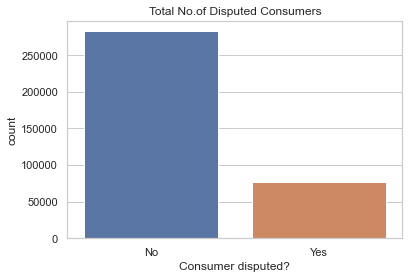

In [22]:
sns.set_theme(style="whitegrid")
plt.title("Total No.of Disputed Consumers")
sns.countplot(x=train["Consumer disputed?"])
plt.show()

Plot bar graph for the total no of disputes products-wise with help of seaborn

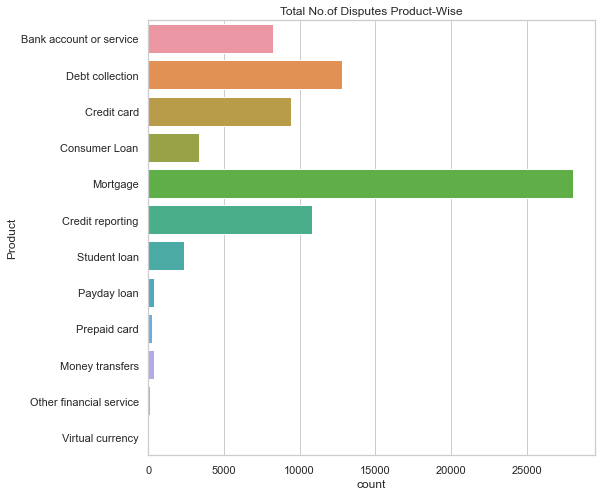

In [23]:
plt.figure(figsize=(8,8))
plt.title("Total No.of Disputes Product-Wise")
sns.countplot(data=disputed_cons, y="Product")
plt.show()

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

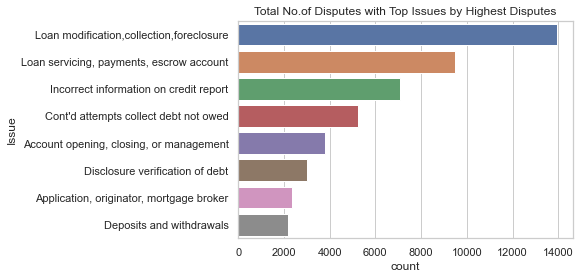

In [24]:
plt.figure(figsize=(6,4))
plt.title("Total No.of Disputes with Top Issues by Highest Disputes")
sns.countplot(data=disputed_cons, y="Issue",order=disputed_cons.Issue.value_counts().iloc[:8].index)
plt.show()

Plot bar graph for the total no of disputes by State with Maximum Disputes

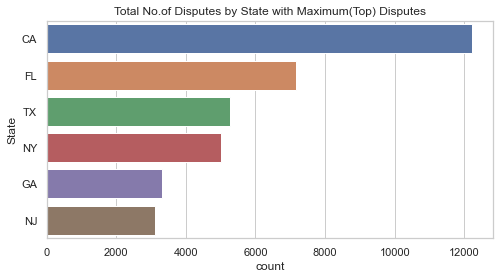

In [25]:
plt.figure(figsize=(8,4))
plt.title("Total No.of Disputes by State with Maximum(Top) Disputes")
sns.countplot(data=disputed_cons, y="State",order=disputed_cons.State.value_counts().iloc[:6].index)
plt.show()

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

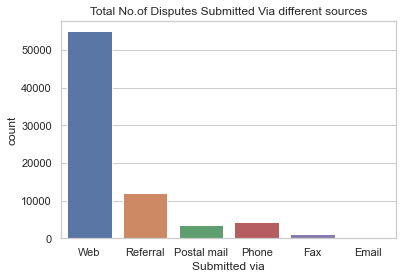

In [26]:
plt.figure(figsize=(6,4))
plt.title("Total No.of Disputes Submitted Via different sources")
sns.countplot(data=disputed_cons, x="Submitted via")
plt.show()

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

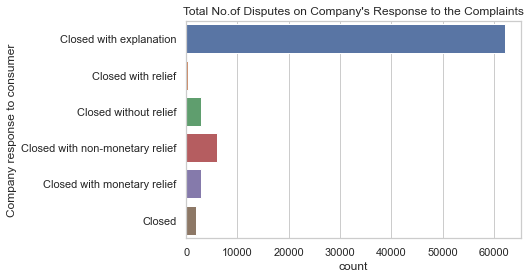

In [27]:
plt.figure(figsize=(6,4))
plt.title("Total No.of Disputes on Company's Response to the Complaints")
sns.countplot(data=disputed_cons, y="Company response to consumer")
plt.show()

Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

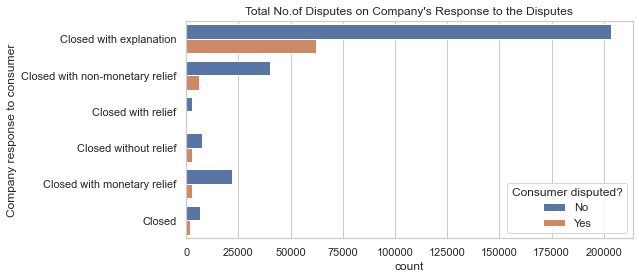

In [28]:
plt.figure(figsize=(8,4))
plt.title("Total No.of Disputes on Company's Response to the Disputes")
sns.countplot(data=train, y="Company response to consumer",hue="Consumer disputed?")
plt.show()

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

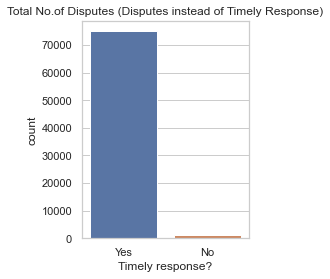

In [29]:
plt.figure(figsize=(3,4))
plt.title("Total No.of Disputes (Disputes instead of Timely Response)")
sns.countplot(data=disputed_cons, x="Timely response?")
plt.show()

Plot bar graph for the total no of disputes over Year Wise Complaints

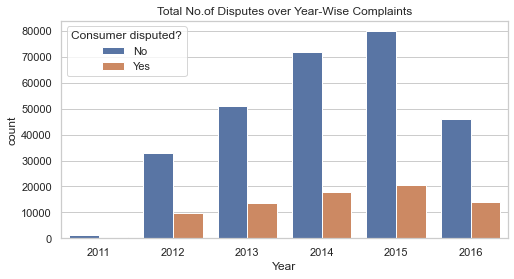

In [30]:
plt.figure(figsize=(8,4))
plt.title("Total No.of Disputes over Year-Wise Complaints")
sns.countplot(data=train, x="Year",hue="Consumer disputed?")
plt.show()

Plot bar graph for the total no of disputes over Year Wise Disputes

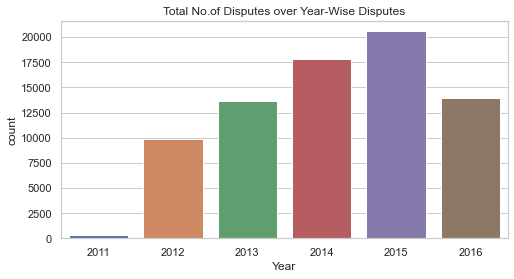

In [31]:
plt.figure(figsize=(8,4))
plt.title("Total No.of Disputes over Year-Wise Disputes")
sns.countplot(data=disputed_cons, x="Year")
plt.show()

Plot  bar graph for the top companies with highest complaints

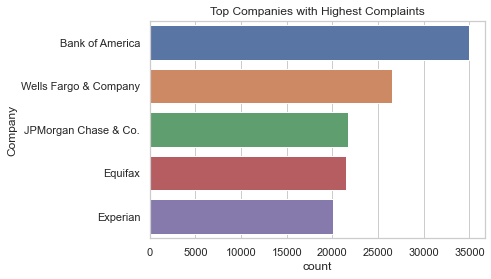

In [32]:
plt.figure(figsize=(6,4))
plt.title("Top Companies with Highest Complaints")
sns.countplot(data=train, y="Company",order=train.Company.value_counts().iloc[:5].index)
plt.show()

"Days Held" Column Analysis(describe)

In [33]:
print("Train :\n",train["Days held"].describe())
print("\nTest :\n",test["Days held"].describe())

Train :
 count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

Test :
 count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64


Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [34]:
train.loc[train["Days held"] < 0, "Days held"] = 1
test.loc[test["Days held"] < 0, "Days held"] = 1

Drop Days Held with Negative Values

In [35]:
train= train[train["Days held"]>=0]
test= test[test["Days held"]>=0]

Text pre-processing

In [36]:
relevant_text_train = train['Issue']
relevant_text_test = test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [37]:
train['Issues_cleaned'] = clean_data_train
test['Issues_cleaned'] = clean_data_test
train = train.drop('Issue', axis = 1)
test = test.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [38]:
train = train.drop(['Company', 'State', 'Year', 'Days held'], axis = 1)
test = test.drop(['Company', 'State', 'Year', 'Days held'], axis = 1)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [39]:
train["Consumer disputed?"]=train["Consumer disputed?"].map({'Yes':1 ,'No':0})

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [40]:
trainDum=pd.get_dummies(train,columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?','Issues_cleaned'])
testDum=pd.get_dummies(test,columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?','Issues_cleaned'])

Concate the Dummpy Variables and Drop the Original Columns

In [41]:
df_train=pd.concat((train,trainDum),axis=1)
df_test=pd.concat((test,testDum),axis=1)

df_train = train.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis = 1)
df_test = test.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis = 1)

Calculating TF-IDF

In [42]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

/Users/jagadishvarma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


Replacing Issues_cleaned by Vectorized Issues

In [43]:
df_train =df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

observe train and test datasets

In [44]:
df_train.head()

,Consumer disputed?,Month,Week_Received,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,12,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [45]:
df_test.head()

,Month,Week_Received,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,25,0.0,0.753491,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,9,36,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,5,20,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,7,27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


Observe Shape of new Train and Test Datasets

In [46]:
print("Train :",df_train.shape)
print("Test :",df_test.shape)

Train : (358810, 171)
Test : (119606, 170)


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_data=std_scaler.fit_transform(df_train.iloc[:, 3:])
scaled_data

array([[-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387],
       [-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387],
       [-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387],
       ...,
       [-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387],
       [-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387],
       [-0.45406238, -0.02941366, -0.10672633, ..., -0.02696087,
        -0.11129436, -0.08000387]])

In [48]:
from sklearn.preprocessing import StandardScaler
std_scaler_test=StandardScaler()
scaled_data_test=std_scaler.fit_transform(df_test.iloc[:, 2:])
scaled_data_test

array([[-4.57585643e-01, -2.73163203e-02, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00],
       [-4.57585643e-01,  4.12954463e+01, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00],
       [-4.57585643e-01, -2.73163203e-02, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00],
       ...,
       [-4.57585643e-01, -2.73163203e-02, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00],
       [-4.57585643e-01, -2.73163203e-02, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00],
       [-4.57585643e-01, -2.73163203e-02, -1.06162777e-01, ...,
        -1.13869816e-01, -7.70568805e-02,  0.00000000e+00]])

Do feature selection with help of PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=53)
principalComponents = pca.fit_transform(scaled_data)

In [50]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=53)
principalComponents_test = pca_test.fit_transform(scaled_data_test)

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [51]:
principalDf = pd.DataFrame(data = principalComponents)

In [52]:
principalDf_test = pd.DataFrame(data = principalComponents_test)

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [53]:
X=principalDf
y=df_train['Consumer disputed?']

Split data into Train and Test datasets
(for test data use test excel file data)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=pd.read_csv("Consumer_Complaints_test.csv")

Shapes of the datasets

In [55]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((269107, 53), (89703, 53), (269107,), (89703,), (119606, 17))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [56]:
#Logistic Regression
lr=LogisticRegression(random_state=5).fit(X_train,y_train)
lr_pred=lr.predict(X_val)

#Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
dtc_pred=dtc.predict(X_val)

#Random Forest Classifier
rfc=RandomForestClassifier(random_state=42).fit(X_train,y_train)
rfc_pred=rfc.predict(X_val)

#AdaBostClassifier
ada=AdaBoostClassifier(n_estimators=53,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_val)

#GradientBoosting Classifier
gb_clf=GradientBoostingClassifier(learning_rate=0.6,n_estimators=53)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_val)

#KNN Classifier
knn=KNeighborsClassifier().fit(X_train,y_train)
knn_pred=knn.predict(X_val)

#XGBClassifier
xb_clf=XGBClassifier(learning_rate=0.5,n_estimators=53)
xb_clf.fit(X_train,y_train)
xb_pred=xb_clf.predict(X_val)


In [57]:
print("-------Accuracy Scores----- ")
print("Logistic Regression        :       ",round(accuracy_score(y_val,lr_pred),5))
print("Decision Tree              :       ",round(accuracy_score(y_val,dtc_pred),5))
print("RandomForestClassifier     :       ",round(accuracy_score(y_val,rfc_pred),5))
print("AdaBoost Classifier        :       ",round(accuracy_score(y_val,ada_pred),5))
print("GradientBoostingClassifier :       ",round(accuracy_score(y_val,gb_pred),5))
print("KNearestNeighbors          :       ",round(accuracy_score(y_val,knn_pred),5))
print("RXGB Classifier            :       ",round(accuracy_score(y_val,xb_pred),5))

-------Accuracy Scores----- 
Logistic Regression        :        0.78792
Decision Tree              :        0.78792
RandomForestClassifier     :        0.78792
AdaBoost Classifier        :        0.78792
GradientBoostingClassifier :        0.78792
KNearestNeighbors          :        0.76815
RXGB Classifier            :        0.78792


Final Model and Prediction for test data file

In [58]:
predictions=rfc.predict(principalDf_test)

Export Predictions to CSV

In [61]:
X_test["Prediction"]=predictions

In [62]:
X_test.to_csv("Final.csv",index=False)

--------------The End----------------